In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('Biblio_synthese.csv', on_bad_lines='skip',low_memory=False)

# 1.Premier vue des données

In [3]:
print ( data.info() )
print( data.head(20) )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821132 entries, 0 to 1821131
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   section          object
 1   numéro TEL       object
 2   numéro citation  int64 
 3   type             object
 4   titre            object
dtypes: int64(1), object(4)
memory usage: 69.5+ MB
None
   section         numéro TEL  numéro citation              type  \
0        I  halshs-00005971v1                1           chapter   
1        I  halshs-00005971v1                1              book   
2        I  halshs-00005971v1                1               NaN   
3        I  halshs-00005971v1                1   article-journal   
4        I  halshs-00005971v1                1              book   
5        I  halshs-00005971v1                1   article-journal   
6        I  halshs-00005971v1                1  paper-conference   
7        I  halshs-00005971v1                1           chapter   
8        I  halsh

In [4]:
data.iloc[4,4]

"[' L’agonie d’un laboratoire', 'La science et ses réseaux, genèse et circulation des faits scientifiques']"

0
IX           704112
VI           207835
V            193659
X            157833
II           147759
VIII         125719
IV           104352
VII           84823
III           68715
I             24084
pharmacie      2241
Name: section, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


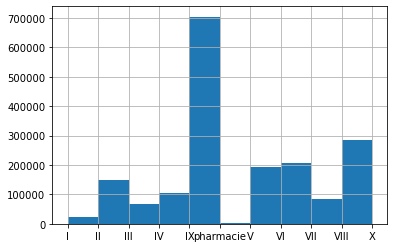

In [5]:
print(data.section.isnull().sum())
print(data.section.value_counts())
print(data.section.hist())
section_list=['I','II','III','IV','V','VI','VII','VIII','IX','X','pharmacie']


##  quel domaine t-ils representent, à part pharmacie?

In [6]:
print(data['numéro TEL'].isnull().sum())
print(data['numéro TEL'].value_counts())
print("Numbre de Theses total est "+  str(len(data['numéro TEL'].value_counts())))



0
tel-01752828v1       554
tel-00764136v1       458
tel-02166968v1       454
tel-00004693v1       435
tel-01169050v1       414
                    ... 
tel-00945661v1         1
tel-00431288v1         1
tel-00481850v1         1
pastel-00880312v1      1
tel-01136743v1         1
Name: numéro TEL, Length: 22889, dtype: int64
Numbre de Theses total est 22889


##  que c'est que-t-il représente , "numéro TEL" ?

In [7]:
print(data['numéro citation'].isnull().sum())
print(data['numéro citation'].value_counts())

0
1    1821132
Name: numéro citation, dtype: int64


##  que c'est que-t-il représente , "numéro citation" ? 

no-Nan 1551452
NAN percentage 0.14808371935697137
article-journal           1141068
book                       184274
chapter                    110435
paper-conference            88148
thesis                      16492
report                       8608
webpage                      1333
patent                        794
manuscript                    255
personal_communication         20
motion_picture                 14
interview                      11
Name: type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


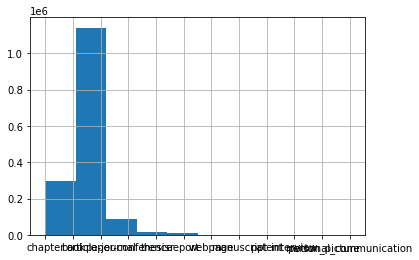

In [8]:
#print(len(data.type))
print("no-Nan "+ str(len(data.type) - data.type.isnull().sum()))
print("NAN percentage "+  str(  (data.type.isnull().sum())/(len(data.type))  )  )
print(data.type.value_counts()) 
print(data.type.hist()) 


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

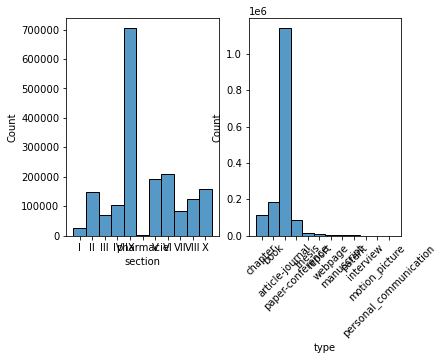

In [9]:
sec_biblio=data.section.value_counts()[section_list].rename_axis('section').reset_index(name='counts')
type_biblio=data.type.value_counts().rename_axis('section').reset_index(name='counts')

fig, axes = plt.subplots(1, 2)

sns.histplot(x = 'section' ,data = data, ax = axes[0])
plt.xticks(rotation=45)
sns.histplot(x = 'type', data = data, ax = axes[1])
#axes[0].set_title("First")
#axes[1].set_title("Second")
#plt.suptitle("Main")
plt.xticks(rotation=45)


In [10]:
#print(len(data.titre))
print("no-nan  "+str(len(data.titre)-data.titre.isnull().sum()))
print("NAN percentage "+  str(  (data.titre.isnull().sum())/(len(data.titre))  )  )
print(data.titre.value_counts())
print( "Different titre  " + str(len( data.titre.value_counts())) )

no-nan  1628696
NAN percentage 0.10566834254738262
Phys                                                                                                                                                                                                                                                                              2498
Angew                                                                                                                                                                                                                                                                             1198
Nucl                                                                                                                                                                                                                                                                              1167
Surf                                                                                                            

In [11]:
sec_biblio=data.section.value_counts()[section_list].rename_axis('section').reset_index(name='counts_biblio')
print(sec_biblio)


      section  counts_biblio
0           I          24084
1          II         147759
2         III          68715
3          IV         104352
4           V         193659
5          VI         207835
6         VII          84823
7        VIII         125719
8          IX         704112
9           X         157833
10  pharmacie           2241


In [12]:
deux_colu_nan=data.dropna(subset=["type","titre"])
print( deux_colu_nan.isna().sum().sum())
print("deux columns non-nan "+str(len(deux_colu_nan)))

0
deux columns non-nan 1414564


In [13]:
new_data=data[~data.isnull().any(axis=1)]
new_data.reset_index(drop=True, inplace=True)
print(new_data.head())
print(new_data.info())
print( len(new_data))

  section         numéro TEL  numéro citation             type  \
0       I  halshs-00005971v1                1          chapter   
1       I  halshs-00005971v1                1             book   
2       I  halshs-00005971v1                1  article-journal   
3       I  halshs-00005971v1                1             book   
4       I  halshs-00005971v1                1  article-journal   

                                               titre  
0                                             Action  
1  Mainstreaming Gender in the European Structura...  
2    Eléments pour une sociologie de la traduction »  
3  [' L’agonie d’un laboratoire', 'La science et ...  
4        Les politiques de discrimination positive »  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414564 entries, 0 to 1414563
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   section          1414564 non-null  object
 1   numéro TEL     

# 2.Analyse descriptive

In [14]:
#new_data.tail()

# 2.1 column "numero TEL"

# 2.1.1 nombre de theses par section

In [15]:
paper_by_sec=new_data.groupby(["section"])["numéro TEL"].count()
#print(data["numéro TEL"].loc[data["section"]=='I'].count())
print(paper_by_sec)

section
I             18953
II           113673
III           50226
IV            76127
IX           565503
V            162379
VI           152879
VII           52559
VIII          95178
X            125303
pharmacie      1784
Name: numéro TEL, dtype: int64


In [16]:
#paper_by_sec1=new_data.groupby(["section"])["numéro TEL"].apply(list).reset_index(name="numero_these")
#print(paper_by_sec1)
#print(  len( paper_by_sec1["numero_these"][2] )  ) 

paper_by_sec2=new_data.groupby(["section"])["numéro TEL"].size()[section_list].reset_index(name="nombre_these")
print(paper_by_sec2 )

      section  nombre_these
0           I         18953
1          II        113673
2         III         50226
3          IV         76127
4           V        162379
5          VI        152879
6         VII         52559
7        VIII         95178
8          IX        565503
9           X        125303
10  pharmacie          1784


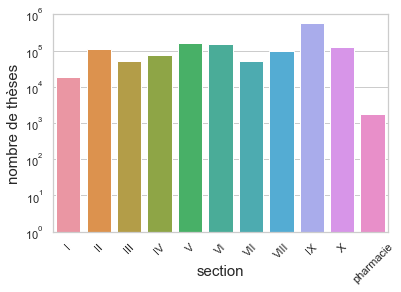

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
 

ax1=sns.barplot(x = paper_by_sec2["section"],
            y = paper_by_sec2["nombre_these"],
            data = paper_by_sec2,log=True )
ax1.set(ylim=(1, 1000000))
plt.xlabel("section",labelpad=-20,fontsize=15)
plt.ylabel("nombre de thèses",fontsize=15)
plt.xticks(rotation=45)
plt.show()

 


 


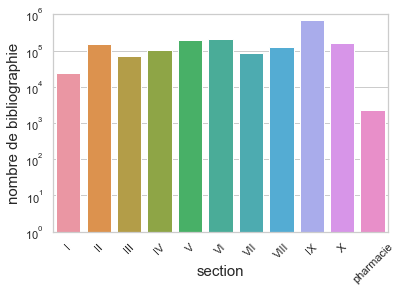

In [18]:
ax2=sns.barplot(x = sec_biblio["section"],
            y = sec_biblio["counts_biblio"],
            data = sec_biblio,log=True )
ax2.set(ylim=(1, 1000000))
plt.xlabel("section",labelpad=-20,fontsize=15)
plt.ylabel("nombre de bibliographie",fontsize=15)
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'nombre de bibliographie')

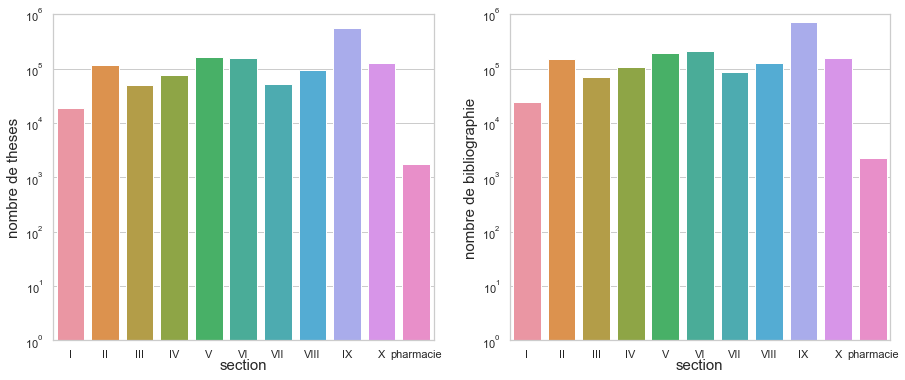

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(ax=axes[0],x = paper_by_sec2["section"],
            y = paper_by_sec2["nombre_these"],
            data = paper_by_sec2,log=True)
axes[0].set(ylim=(1, 1000000))
axes[0].set_xlabel("section",labelpad=-1,fontsize=15)
axes[0].set_ylabel("nombre de theses",fontsize=15)
#axes[0].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[1],x = sec_biblio["section"],
            y = sec_biblio["counts_biblio"],
            data = sec_biblio,log=True)
axes[1].set(ylim=(1, 1000000))
axes[1].set_xlabel("section",labelpad=-1,fontsize=15)
axes[1].set_ylabel("nombre de bibliographie",fontsize=15)
#axes[0].tick_params(axis='x', rotation=45)

      section  nombre_these  counts_biblio
0           I         18953          24084
1          II        113673         147759
2         III         50226          68715
3          IV         76127         104352
4           V        162379         193659
5          VI        152879         207835
6         VII         52559          84823
7        VIII         95178         125719
8          IX        565503         704112
9           X        125303         157833
10  pharmacie          1784           2241


Text(0, 0.5, 'nombre')

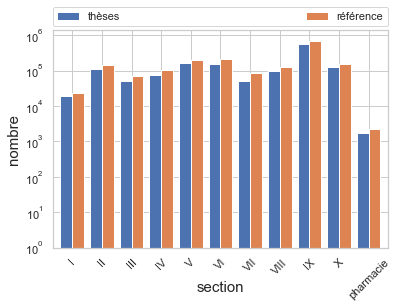

In [20]:
fig1_df=pd.merge(paper_by_sec2,sec_biblio,on="section")
print(fig1_df)

plt.figsize=(15, 6)
fig1_df.plot(x='section',
        kind='bar', width = 0.8,
        stacked=False,
        log=True) 
plt.legend(["thèses","référence"],bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xticks(rotation=45)
plt.xlabel("section",labelpad=-20,fontsize=15)
plt.ylabel("nombre",fontsize=15)


In [21]:
type_biblio=new_data.type.value_counts().rename_axis('type').reset_index(name='counts')
print(type_biblio)
type_list=type_biblio.type
st=type_list.tolist()


type_theses=new_data.groupby(["type"])["numéro TEL"].unique().reset_index(name='unique')
type_theses["count"]=type_theses.unique.str.len()
#print(type_theses)
type_theses1=type_theses.copy()
type_theses1['type_cat'] = pd.Categorical(type_theses1['type'], categories=st, ordered=True )
type_theses1.sort_values('type_cat',inplace=True)
print(type_theses1)






                      type   counts
0          article-journal  1022708
1                     book   174408
2                  chapter   105968
3         paper-conference    85418
4                   thesis    15916
5                   report     8112
6                  webpage     1125
7                   patent      670
8               manuscript      207
9           motion_picture       13
10               interview       10
11  personal_communication        9
                      type                                             unique  \
0          article-journal  [halshs-00005971v1, tel-00125323v1, tel-001505...   
1                     book  [halshs-00005971v1, tel-00125323v1, tel-001505...   
2                  chapter  [halshs-00005971v1, tel-00125323v1, tel-001505...   
6         paper-conference  [halshs-00005971v1, tel-00347798v1, tel-004090...   
10                  thesis  [tel-00232810v1, tel-00409020v1, tel-00577672v...   
9                   report  [tel-00365280v1, t

In [22]:
print(type_theses1)
print(type_biblio)


                      type                                             unique  \
0          article-journal  [halshs-00005971v1, tel-00125323v1, tel-001505...   
1                     book  [halshs-00005971v1, tel-00125323v1, tel-001505...   
2                  chapter  [halshs-00005971v1, tel-00125323v1, tel-001505...   
6         paper-conference  [halshs-00005971v1, tel-00347798v1, tel-004090...   
10                  thesis  [tel-00232810v1, tel-00409020v1, tel-00577672v...   
9                   report  [tel-00365280v1, tel-00409020v1, tel-01233856v...   
11                 webpage  [tel-00466462v1, tel-00561450v1, tel-00832120v...   
7                   patent  [tel-02788522v2, tel-00731169v1, pastel-000016...   
4               manuscript  [pastel-00565210v1, pastel-01020979v1, tel-001...   
5           motion_picture  [tel-01730221v1, tel-00351831v1, tel-00423884v...   
3                interview  [tel-00838599v1, tel-01250650v1, tel-01751196v...   
8   personal_communication  

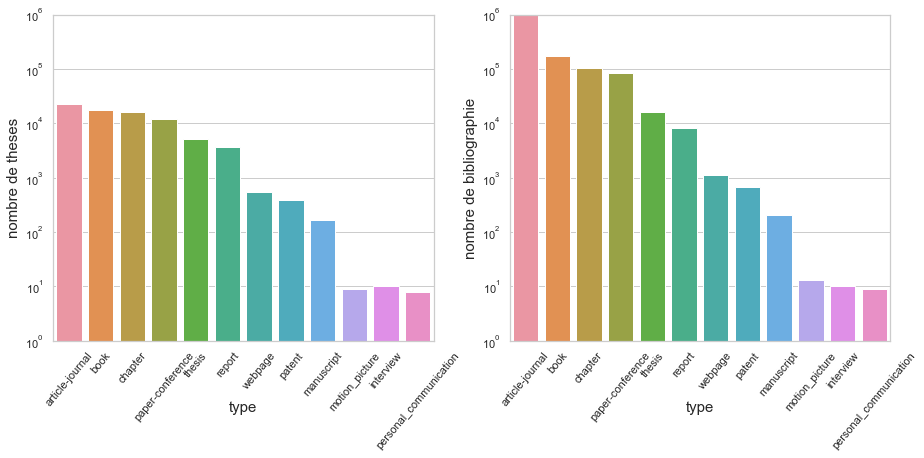

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(ax=axes[0],x =type_theses1["type_cat"],
            y = type_theses1["count"],
            data = type_theses1,log=True)
axes[0].set(ylim=(1, 1000000))
axes[0].set_xlabel("type",labelpad=-50,fontsize=15)
axes[0].set_ylabel("nombre de theses",fontsize=15)
axes[0].tick_params(axis='x', rotation=50)

sns.barplot(ax=axes[1],x = type_biblio["type"],
            y = type_biblio["counts"],
            data = type_biblio,log=True)
axes[1].set(ylim=(1, 1000000))
axes[1].set_xlabel("type",labelpad=-50,fontsize=15)
axes[1].set_ylabel("nombre de bibliographie",fontsize=15)
axes[1].tick_params(axis='x', rotation=50)

                      type  count   counts
0          article-journal  22776  1022708
1                     book  17818   174408
2                  chapter  16329   105968
3         paper-conference  11920    85418
4                   thesis   5247    15916
5                   report   3688     8112
6                  webpage    549     1125
7                   patent    391      670
8               manuscript    164      207
9           motion_picture      9       13
10               interview     10       10
11  personal_communication      8        9


174390

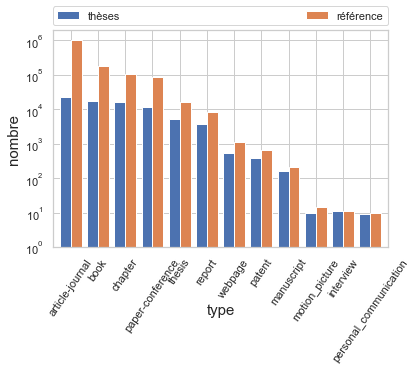

In [24]:
fig2_df=pd.merge(type_theses1[['type','count']],type_biblio,on="type")
print(fig2_df)
 

plt.figsize=(15, 6)
fig2_df.plot(x='type',
        kind='bar', width=0.8,
        stacked=False,
        log=True) 
plt.legend(["thèses","référence"],bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xticks(rotation=55)
plt.xlabel("type",labelpad=-60,fontsize=15)
plt.ylabel("nombre",fontsize=15)
174390

# 2.1.2 Nombre de Bibliographie par theses 

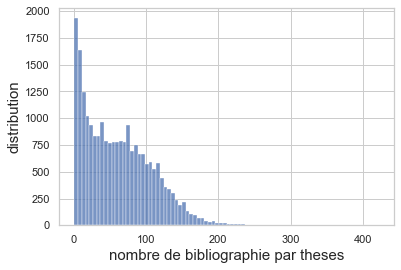

           numéro TEL  counts
0      tel-00004693v1     422
1      tel-02166968v1     355
2      tel-00116347v1     352
3      tel-01072246v1     301
4      tel-01531185v1     288
5      tel-01292139v1     286
6   pastel-00566215v1     282
7   pastel-00000906v1     278
8      tel-02798650v1     271
9      tel-02169918v1     270
10     tel-00794797v1     265
11     tel-02081078v1     265
12     tel-01599035v1     259
13     tel-00545209v1     257
14     tel-00009829v1     256
15     tel-00383967v1     254
16  pastel-00565210v1     254
17     tel-02144026v1     251
18  pastel-00005014v1     250
19     tel-02525782v1     249


In [25]:
numref_by_thes=new_data['numéro TEL'].value_counts().rename_axis("numéro TEL").reset_index(name="counts")
sns.set(style="whitegrid")
ax0=sns.histplot(data=numref_by_thes,x="counts")
plt.xlabel("nombre de bibliographie par theses",fontsize=15)
plt.ylabel("distribution",fontsize=15)
plt.show()
print(numref_by_thes.head(20))

In [26]:
df1=new_data[["section","numéro TEL"]]
print("======df1===========")
print(df1.info())
print("======numref_by_thes===========")
print(numref_by_thes.info())
sec_biblio=pd.merge( df1,numref_by_thes,on='numéro TEL')
print("======sec_biblio===========")
print(sec_biblio)

======df1===========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414564 entries, 0 to 1414563
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   section     1414564 non-null  object
 1   numéro TEL  1414564 non-null  object
dtypes: object(2)
memory usage: 21.6+ MB
None
======numref_by_thes===========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22875 entries, 0 to 22874
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   numéro TEL  22875 non-null  object
 1   counts      22875 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 357.5+ KB
None
======sec_biblio===========
        section         numéro TEL  counts
0             I  halshs-00005971v1     130
1             I  halshs-00005971v1     130
2             I  halshs-00005971v1     130
3             I  halshs-00005971v1     130
4             I  halshs-00005971v1     130
...       

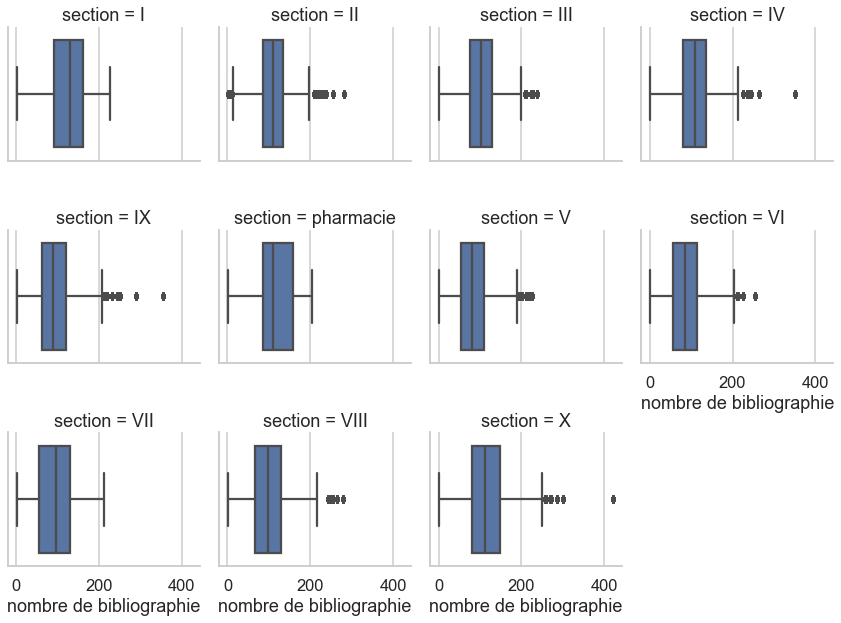

In [27]:
sec_biblio_dis=sec_biblio.copy()
sns.set()
sns.set_context('talk')
sns.set_style(style="whitegrid")
#sns.set_style('white')
sect11=sns.FacetGrid(data=sec_biblio_dis,col='section',col_wrap=4)
#option1
#sect11.map_dataframe(sns.histplot,'counts',binwidth=10)
#sect11.set_axis_labels('nombre de bibliographie','distribution')
#option 2
sect11.map_dataframe(sns.boxplot,'counts' ) 
sect11.set_axis_labels('nombre de bibliographie' )

In [28]:
sec_biblio_dis.head()

section         numéro TEL  counts
0       I  halshs-00005971v1     130
1       I  halshs-00005971v1     130
2       I  halshs-00005971v1     130
3       I  halshs-00005971v1     130
4       I  halshs-00005971v1     130

In [29]:
# 2.2 column "type"

# 2.2.1 Nombre de type par section

In [30]:
#type_by_sec=new_data.groupby(["section"])["type"].value_counts()
type_by_sec=new_data.groupby(["section","type"])["type"].size().reset_index(name="nombre_type")
print(type_by_sec)

       section              type  nombre_type
0            I   article-journal         8598
1            I              book         7421
2            I           chapter         2818
3            I  paper-conference           50
4            I            report           16
..         ...               ...          ...
100  pharmacie   article-journal         1673
101  pharmacie              book           50
102  pharmacie           chapter           47
103  pharmacie  paper-conference           11
104  pharmacie            report            3

[105 rows x 3 columns]


In [31]:
type_by_sec2=new_data.groupby(["section"])["type"].unique().reset_index(name="type_rappele")
type_by_sec2['length'] = type_by_sec2['type_rappele'].str.len()
print(type_by_sec2 ) 
print(type_by_sec2["type_rappele"][1] )


      section                                       type_rappele  length
0           I  [chapter, book, article-journal, paper-confere...       7
1          II  [article-journal, book, chapter, paper-confere...      11
2         III  [article-journal, book, chapter, paper-confere...      10
3          IV  [article-journal, book, chapter, report, paper...      11
4          IX  [article-journal, thesis, paper-conference, bo...      11
5           V  [book, article-journal, chapter, paper-confere...      11
6          VI  [article-journal, book, paper-conference, chap...      10
7         VII  [article-journal, paper-conference, book, chap...       9
8        VIII  [article-journal, chapter, paper-conference, b...      10
9           X  [article-journal, book, chapter, thesis, paper...      10
10  pharmacie  [article-journal, report, book, chapter, paper...       5
['article-journal' 'book' 'chapter' 'paper-conference' 'thesis' 'report'
 'manuscript' 'webpage' 'interview' 'motion_picture

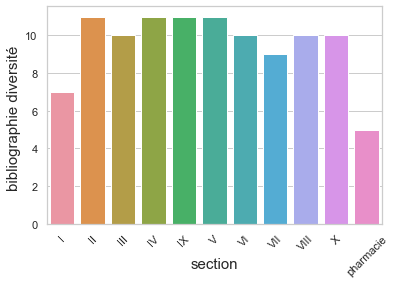

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")



ax1=sns.barplot(x = type_by_sec2["section"],
            y = type_by_sec2["length"],
            data = type_by_sec2)

plt.xlabel("section",labelpad=-20,fontsize=15)
plt.ylabel("bibliographie diversité ",fontsize=15)
plt.xticks(rotation=45)
plt.show()




# 2.2.2 Nombre de type par theses 

In [33]:
count_numtype_by_thes=new_data.groupby(['numéro TEL'])['type'].value_counts().reset_index(name="count")

numtype_by_thes=new_data.groupby(['numéro TEL'])['type'].unique().reset_index(name="type_rappele")
numtype_by_thes['length'] = numtype_by_thes['type_rappele'].str.len()
print(numtype_by_thes)
print(numtype_by_thes.length.max())

           numéro TEL                                       type_rappele  \
0      hal-00002866v1  [article-journal, thesis, paper-conference, bo...   
1      hal-00007605v2  [article-journal, book, paper-conference, chap...   
2      hal-00015367v1                [article-journal, paper-conference]   
3      hal-00015393v1  [article-journal, book, chapter, paper-confere...   
4      hal-00211889v1  [article-journal, book, paper-conference, chap...   
...               ...                                                ...   
22870  tel-02918209v1                                  [article-journal]   
22871  tel-02918211v1  [book, thesis, article-journal, paper-conference]   
22872  tel-02918212v1  [article-journal, paper-conference, chapter, b...   
22873  tel-02918214v1  [book, chapter, article-journal, report, paper...   
22874  tel-02918228v1                            [article-journal, book]   

       length  
0           6  
1           4  
2           2  
3           4  
4      

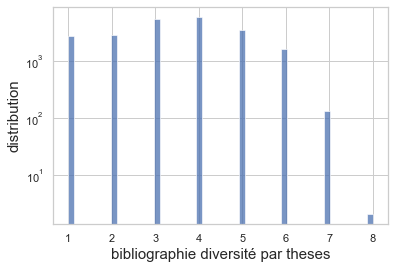

In [34]:
sns.set(style="whitegrid")
ax0=sns.histplot(data=numtype_by_thes,x="length" )
ax0.set_yscale("log")
plt.xlabel("bibliographie diversité par theses",fontsize=15)
plt.ylabel("distribution",fontsize=15)
plt.show()

C:\Users\wr012\AppData\Local\Temp/ipykernel_24940/3573942251.py:7: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[0].set(ylim=( 0, 10000))
C:\Users\wr012\AppData\Local\Temp/ipykernel_24940/3573942251.py:20: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[1].set(ylim=( 0, 10000))


Text(7.5, 1000, '(B)')

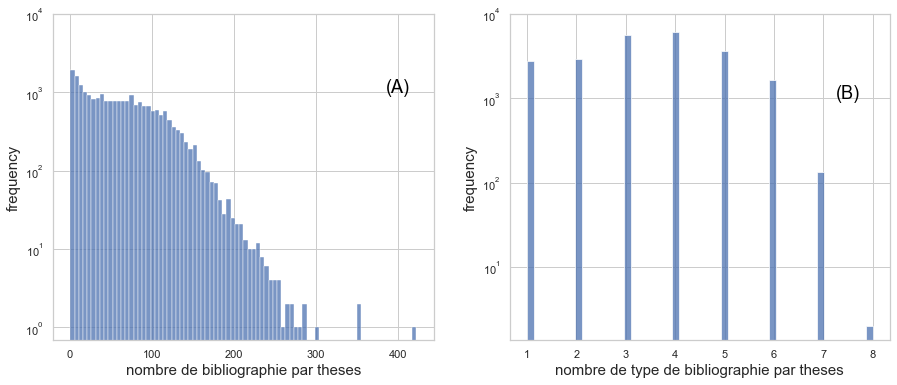

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(ax=axes[0],data=numref_by_thes,x="counts")
axes[0].set_xlabel("nombre de bibliographie par theses",fontsize=15)
axes[0].set_ylabel("frequency",fontsize=15)
axes[0].set_yscale("log")
axes[0].set(ylim=( 0, 10000))
axes[0].text(400, 1000, 
              "(A)",
              color="black",
              fontsize=18, 
              ha='center')


sns.histplot(ax=axes[1],data=numtype_by_thes,x="length" )
#axes[1].set_yscale("log")
axes[1].set_xlabel("nombre de type de bibliographie par theses",fontsize=15)
axes[1].set_ylabel("frequency",fontsize=15)
axes[1].set_yscale("log")
axes[1].set(ylim=( 0, 10000))
axes[1].text(7.5, 1000, 
              "(B)",
              color="black",
              fontsize=18, 
              ha='center')


In [36]:
count_numtype_by_thes=new_data.groupby(['section','numéro TEL'])['type'].value_counts().reset_index(name="count")
 
print(count_numtype_by_thes.head(10))


  section         numéro TEL              type  count
0       I  halshs-00005971v1   article-journal     74
1       I  halshs-00005971v1           chapter     32
2       I  halshs-00005971v1              book     21
3       I  halshs-00005971v1  paper-conference      3
4       I     tel-00125323v1   article-journal    113
5       I     tel-00125323v1              book     83
6       I     tel-00125323v1           chapter     29
7       I     tel-00150545v1              book     39
8       I     tel-00150545v1   article-journal     15
9       I     tel-00150545v1           chapter      2


In [37]:
type_weight_sec=new_data.groupby(['section','type'])['type'].count().reset_index(name="count")
print(type_weight_sec.head(20))


   section              type  count
0        I   article-journal   8598
1        I              book   7421
2        I           chapter   2818
3        I  paper-conference     50
4        I            report     16
5        I            thesis     17
6        I           webpage     33
7       II   article-journal  72760
8       II              book  26065
9       II           chapter  12710
10      II         interview      1
11      II        manuscript     43
12      II    motion_picture      1
13      II  paper-conference   1429
14      II            patent      1
15      II            report    316
16      II            thesis    222
17      II           webpage    125
18     III   article-journal  19107
19     III              book  22639


In [38]:
paper_by_sec2

section  nombre_these
0           I         18953
1          II        113673
2         III         50226
3          IV         76127
4           V        162379
5          VI        152879
6         VII         52559
7        VIII         95178
8          IX        565503
9           X        125303
10  pharmacie          1784

In [39]:
#df=type_weight_sec.pivot(index="section",columns="type",values='count')
#print(df["book"])
#df.plot(kind='bar')

import plotly.express as px
 
#fig = px.bar(type_weight_sec, x="section", y="count", color="type",text="type")
fig = px.bar(type_weight_sec, x="section", y="count", color="type")
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.71
))

fig.show()

In [40]:
type_weight_sec1=pd.DataFrame()
for i in range(0,len(paper_by_sec2)):
    sec=paper_by_sec2.section[i]
    pap=paper_by_sec2.nombre_these[i]
    df=pd.DataFrame()
    df=type_weight_sec.loc[type_weight_sec.section==sec]
    df["countVSpap"]=df['count'].div(pap)
    type_weight_sec1=pd.concat([type_weight_sec1,df])
print(type_weight_sec1)    

       section              type  count  countVSpap
0            I   article-journal   8598    0.453648
1            I              book   7421    0.391548
2            I           chapter   2818    0.148684
3            I  paper-conference     50    0.002638
4            I            report     16    0.000844
..         ...               ...    ...         ...
100  pharmacie   article-journal   1673    0.937780
101  pharmacie              book     50    0.028027
102  pharmacie           chapter     47    0.026345
103  pharmacie  paper-conference     11    0.006166
104  pharmacie            report      3    0.001682

[105 rows x 4 columns]


C:\Users\wr012\AppData\Local\Temp/ipykernel_24940/2687372785.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
import plotly.express as px
 
#fig = px.bar(type_weight_sec, x="section", y="count", color="type",text="type")
fig = px.bar(type_weight_sec1, x="section", y="countVSpap", color="type",labels={
                     "section": "section",
                     "countVSpap": "Pourcentage des références",
                     "type": "type"
                 })
fig.update_layout(font=dict(
        family="Arial, monospace",
        size=18,
        color="black"
    ))


fig.show()

In [42]:
count_numtype_by_thes_dis

NameError: name 'count_numtype_by_thes_dis' is not defined

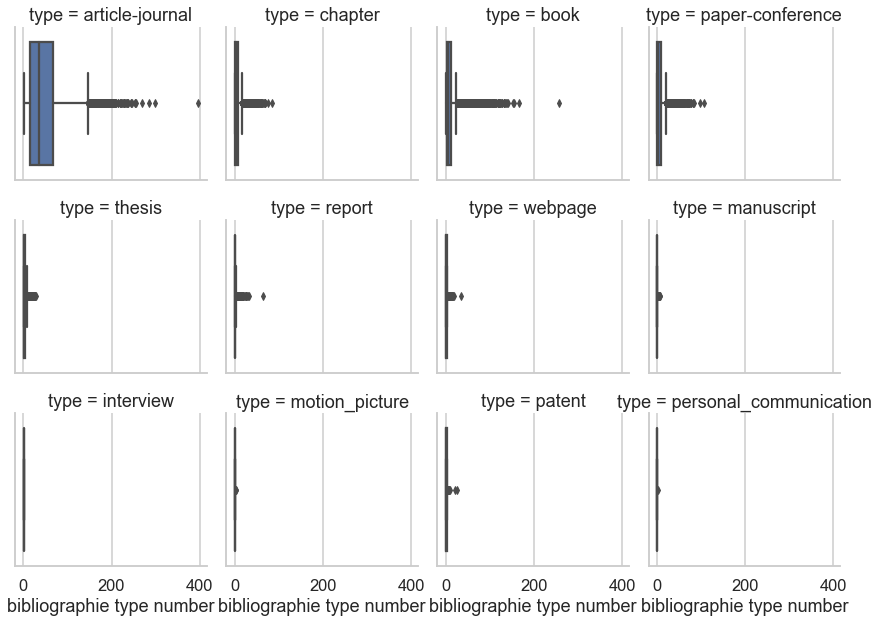

In [43]:
count_numtype_by_thes_dis=count_numtype_by_thes.copy()
sns.set()
sns.set_context('talk')
sns.set_style(style="whitegrid")
#sns.set_style('white')
sect21=sns.FacetGrid(data=count_numtype_by_thes_dis,col='type',col_wrap=4)
#option1
#sect21.map_dataframe(sns.histplot,'count',binwidth=10)
#sect21.set_axis_labels('bibliographie diversité','distribution')
 
#option 2
sect21.map_dataframe(sns.boxplot,'count' ) 
sect21.set_axis_labels('bibliographie type number' )

In [44]:
count_numtype_by_thes1=new_data.groupby(['section','numéro TEL'])['type'].unique().reset_index(name="type_rappele")
count_numtype_by_thes1['len_type_rapp'] = count_numtype_by_thes1['type_rappele'].str.len()
print(count_numtype_by_thes1.head(10))


  section         numéro TEL  \
0       I  halshs-00005971v1   
1       I     tel-00125323v1   
2       I     tel-00150545v1   
3       I     tel-00168467v1   
4       I     tel-00184150v1   
5       I     tel-00232810v1   
6       I     tel-00280322v1   
7       I     tel-00286432v1   
8       I     tel-00296643v1   
9       I     tel-00300560v1   

                                        type_rappele  len_type_rapp  
0  [chapter, book, article-journal, paper-confere...              4  
1                   [article-journal, book, chapter]              3  
2                   [article-journal, chapter, book]              3  
3                                          [chapter]              1  
4                   [article-journal, book, chapter]              3  
5           [article-journal, chapter, book, thesis]              4  
6                   [book, chapter, article-journal]              3  
7                   [chapter, article-journal, book]              3  
8                

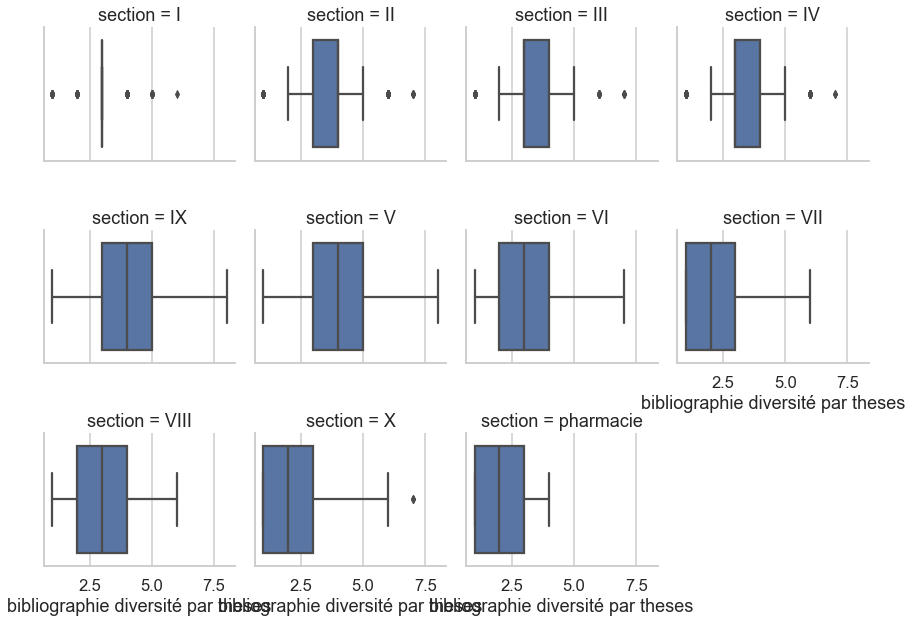

In [45]:
count_numtype_by_thes1_dis=count_numtype_by_thes1.copy()
sns.set()
sns.set_context('talk')
sns.set_style(style="whitegrid")
 
sect31=sns.FacetGrid(data=count_numtype_by_thes1_dis,col='section',col_wrap=4)
#option1
#sect31.map_dataframe(sns.histplot,'count',binwidth=10)
#sect31.set_axis_labels('bibliographie diversité','distribution')
 
#option 2
sect31.map_dataframe(sns.boxplot,'len_type_rapp' ) 
sect31.set_axis_labels('bibliographie diversité par theses' )

Text(0.5, 0, 'section')

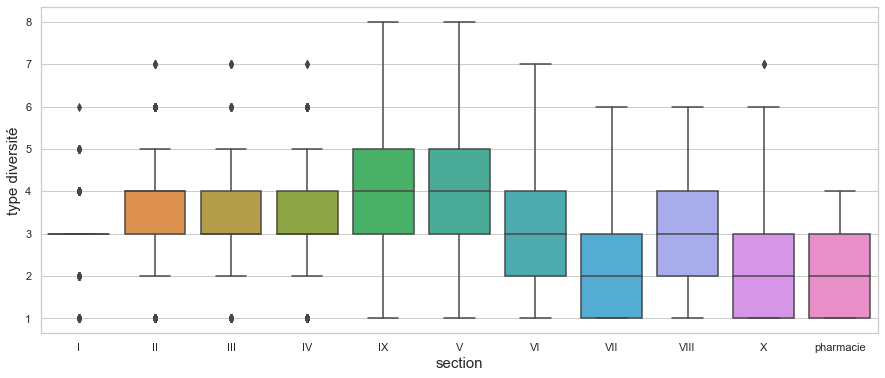

In [50]:
plt.figure(figsize=(15,6))
sns.set(style="whitegrid")
p=sns.boxplot(x='section', y ='len_type_rapp', data=count_numtype_by_thes1_dis)
p.set_ylabel("type diversité", fontsize = 15)
p.set_xlabel("section", fontsize = 15)

# 2.3 column "titre"

## 2.3.1 longueur du titre de chaque bibliographie

list(set(["aaAbcabccd","aaabcabccd","aaAbcabccd"]))


from collections import OrderedDict
'  '.join(OrderedDict.fromkeys(["aaAbcabccd","aaabcabccd","aaAbcabccd"] ).keys())

In [51]:
titre_list=new_data['titre'].str.lower()
print(titre_list.head(11))

0                                                action
1     mainstreaming gender in the european structura...
2       eléments pour une sociologie de la traduction »
3     [' l’agonie d’un laboratoire', 'la science et ...
4           les politiques de discrimination positive »
5                         administration et politique »
6      les injonctions contradictoires des politique...
7      calling the tune without paying the piper? so...
8      l’etat, les droits des femmes et les recherch...
9                       la longue marche vers la parité
10     le néo-institutionnalisme dans l’analyse des ...
Name: titre, dtype: object


In [52]:
print( len(titre_list) )
print(len(new_data))

1414564
1414564



sen=titre_list[11]
print(sen)
print(sen.split() )
st1=' '.join(e for e in sen if (e.isalnum() or e.isspace()))

import re
st2=re.sub('\W+', ' ', sen)





In [53]:
import re 
mot_titre=[]
mot_titre_low=[]
for i in range(0,len(titre_list)):
    st=re.sub('\W+', ' ', titre_list[i])
    mot_titre.append( st )


In [54]:
print(len(mot_titre))
print(mot_titre[3])
print(titre_list[3])

1414564
 l agonie d un laboratoire la science et ses réseaux genèse et circulation des faits scientifiques 
[' l’agonie d’un laboratoire', 'la science et ses réseaux, genèse et circulation des faits scientifiques']


In [55]:
new_data1=new_data.copy()
new_data1['titre_mot'] = pd.Series(mot_titre)
new_data1.head()

section         numéro TEL  numéro citation             type  \
0       I  halshs-00005971v1                1          chapter   
1       I  halshs-00005971v1                1             book   
2       I  halshs-00005971v1                1  article-journal   
3       I  halshs-00005971v1                1             book   
4       I  halshs-00005971v1                1  article-journal   

                                               titre  \
0                                             Action   
1  Mainstreaming Gender in the European Structura...   
2    Eléments pour une sociologie de la traduction »   
3  [' L’agonie d’un laboratoire', 'La science et ...   
4        Les politiques de discrimination positive »   

                                           titre_mot  
0                                             action  
1  mainstreaming gender in the european structura...  
2     eléments pour une sociologie de la traduction   
3   l agonie d un laboratoire la science et ses r...  
4         les politiques de discrimination positive

In [56]:
titre_len=[]
titre_mot_split=[[]] * len(titre_list)
for i in range(0,len(titre_list)):
    titre_mot_split[i]=new_data1['titre_mot'][i].split()
    titre_len.append(len( titre_mot_split[i] ) )

In [57]:
titre_mot_split[0]+titre_mot_split[0]


['action', 'action']

In [58]:
new_data1['titre_longueur'] = pd.Series(titre_len)
new_data1['titre_mot_split'] = pd.Series(titre_mot_split)
print( new_data1.head() )
new_data21=new_data1[ new_data1['titre_longueur']!=0]
print(len( new_data1))
print(len( new_data21))


new_data21['section_cat'] = pd.Categorical(new_data21['section'], categories=section_list, ordered=True )
new_data21.sort_values('section_cat',inplace=True)
#print(new_data21)
new_data2=new_data21


  section         numéro TEL  numéro citation             type  \
0       I  halshs-00005971v1                1          chapter   
1       I  halshs-00005971v1                1             book   
2       I  halshs-00005971v1                1  article-journal   
3       I  halshs-00005971v1                1             book   
4       I  halshs-00005971v1                1  article-journal   

                                               titre  \
0                                             Action   
1  Mainstreaming Gender in the European Structura...   
2    Eléments pour une sociologie de la traduction »   
3  [' L’agonie d’un laboratoire', 'La science et ...   
4        Les politiques de discrimination positive »   

                                           titre_mot  titre_longueur  \
0                                             action               1   
1  mainstreaming gender in the european structura...              15   
2     eléments pour une sociologie de la traductio

C:\Users\wr012\AppData\Local\Temp/ipykernel_24940/442790705.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
mot_sec=new_data2.groupby("section")["titre_longueur"].value_counts()
print(mot_sec)
print( new_data2["titre_longueur"].max())

section    titre_longueur
I          5                 1408
           6                 1405
           8                 1403
           7                 1380
           10                1306
                             ... 
pharmacie  147                  1
           155                  1
           169                  1
           173                  1
           242                  1
Name: titre_longueur, Length: 1805, dtype: int64
617


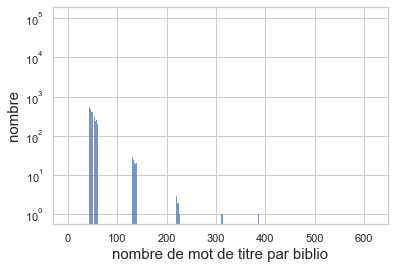

In [60]:
sns.set(style="whitegrid")
ax0=sns.histplot(data=new_data2,x="titre_longueur" )
ax0.set_yscale("log")
plt.xlabel("nombre de mot de titre par biblio",fontsize=15)
plt.ylabel("nombre",fontsize=15)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='titre_longueur'>

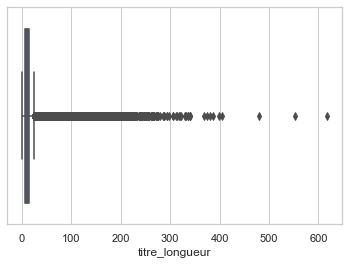

In [175]:
n = new_data2["titre_longueur"]
arr = np.array(n)
sns.boxplot(n)
#sns.stripplot(n, color = 'red')


## 2.3.2 longueur du titre de chaque section

In [178]:
new_data2.head()

section         numéro TEL  numéro citation     type  \
0           I  halshs-00005971v1                1  chapter   
12638       I     tel-01529191v1                1     book   
12637       I     tel-01529191v1                1     book   
12636       I     tel-01529191v1                1     book   
12635       I     tel-01529191v1                1     book   

                                                   titre  \
0                                                 Action   
12638                     Sociologie des réseaux sociaux   
12637  Le travail créateur. S’accomplir dans l’incertain   
12636  Le bain de l’histoire. Charlotte Corday et l’a...   
12635  L'identité masculine en crise au tournant du s...   

                                               titre_mot  titre_longueur  \
0                                                 action               1   
12638                     sociologie des réseaux sociaux               4   
12637   le travail créateur s accomplir dans l incertain               8   
12636  le bain de l histoire charlotte corday et l at...              14   
12635  l identité masculine en crise au tournant du s...              11   

                                         titre_mot_split section_cat  
0                                               [action]           I  
12638                [sociologie, des, réseaux, sociaux]           I  
12637  [le, travail, créateur, s, accomplir, dans, l,...           I  
12636  [le, bain, de, l, histoire, charlotte, corday,...           I  
12635  [l, identité, masculine, en, crise, au, tourna...           I

Text(0.5, 0, 'section')

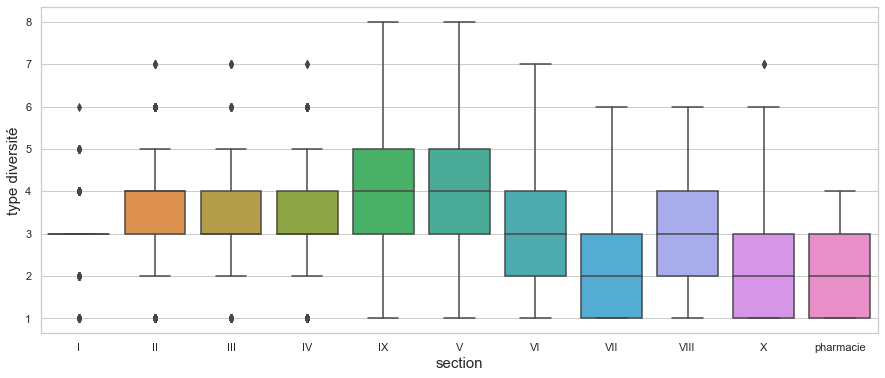

Text(0.5, 0, 'section')

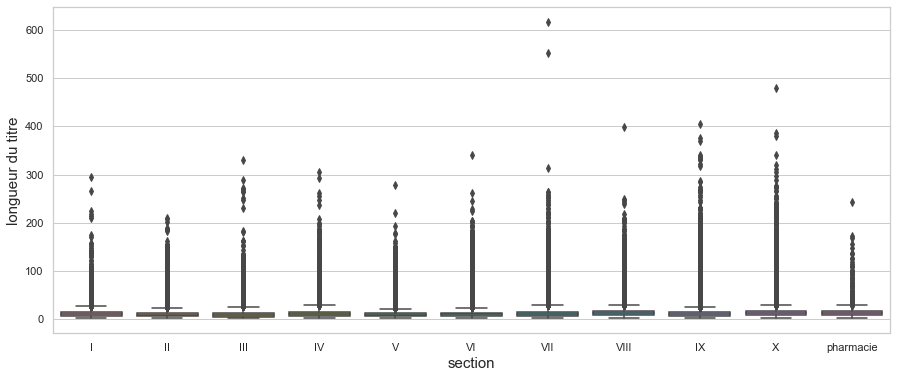

In [182]:
plt.figure(figsize=(15,6))
sns.set(style="whitegrid")
p=sns.boxplot(x='section', y ='titre_longueur', data=new_data2)
p.set_ylabel("longueur du titre", fontsize = 15)
p.set_xlabel("section", fontsize = 15)

<AxesSubplot:title={'center':'titre_longueur'}, xlabel='section'>

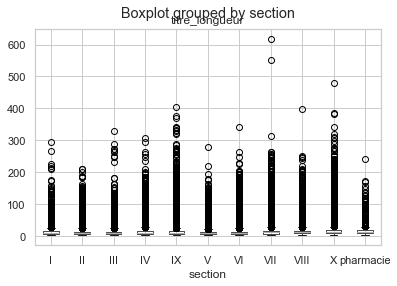

In [177]:
new_data2.boxplot(by ='section', column =['titre_longueur'] )

## 2.3.3 plus frequent mot du titre de la bibliographie par section 

In [43]:
titre_mean=new_data2.groupby(["section"])["titre_longueur"].agg('mean').reset_index(name="mean")
titre_median= new_data2.groupby(["section"])["titre_longueur"].agg('median').reset_index(name="median")
titre_max=new_data2.groupby(["section"])["titre_longueur"].agg('max').reset_index(name="max") 
titre_min= new_data2.groupby(["section"])["titre_longueur"].agg('min').reset_index(name="min")
 

In [44]:
titre_df = titre_mean.merge(titre_median,on='section').merge(titre_max,on='section').merge(titre_min,on='section')
print(titre_df)

      section       mean  median  max  min
0           I  11.583949    10.0  294    1
1          II  11.011182     9.0  210    1
2         III  10.633536     8.0  330    1
3          IV  12.413967    10.0  306    1
4          IX  11.221181    10.0  405    1
5           V   9.550844     9.0  279    1
6          VI  10.515712    10.0  340    1
7         VII  12.338978    11.0  617    1
8        VIII  13.540063    12.0  398    1
9           X  14.336842    12.0  480    1
10  pharmacie  15.632848    13.0  242    1


In [45]:
lon=20
print( len( new_data2.loc[ new_data2['titre_longueur']<lon] ) )

print ( new_data2[new_data2.titre_longueur > lon].iloc[8][4] )

1295086
[' L’union européenne et la mise en uvre de l’égalité des chances entre hommes et femmes », Les rapports du Sénat, Paris', ' L’Europe sociale »']


In [46]:
titre_20=new_data2.loc[ new_data2['titre_longueur']<=20]
print( titre_20.head() )

print ( len(titre_20)/len(new_data2) )

  section         numéro TEL  numéro citation             type  \
0       I  halshs-00005971v1                1          chapter   
1       I  halshs-00005971v1                1             book   
2       I  halshs-00005971v1                1  article-journal   
3       I  halshs-00005971v1                1             book   
4       I  halshs-00005971v1                1  article-journal   

                                               titre  \
0                                             Action   
1  Mainstreaming Gender in the European Structura...   
2    Eléments pour une sociologie de la traduction »   
3  [' L’agonie d’un laboratoire', 'La science et ...   
4        Les politiques de discrimination positive »   

                                           titre_mot  titre_longueur  \
0                                             action               1   
1  mainstreaming gender in the european structura...              15   
2     eléments pour une sociologie de la traductio

In [47]:
titre_20.iloc[20]['section']

'I'

In [80]:
#titre_20_1=titre_20.iloc[:20,[0,7]]
titre_20_1=titre_20.iloc[:,[0,7]]
print(titre_20_1)

        section                                    titre_mot_split
0             I                                           [action]
1             I  [mainstreaming, gender, in, the, european, str...
2             I  [eléments, pour, une, sociologie, de, la, trad...
3             I  [l, agonie, d, un, laboratoire, la, science, e...
4             I    [les, politiques, de, discrimination, positive]
...         ...                                                ...
1414544       X  [transcriptional, regulation, of, the, ikzf1, ...
1414545       X  [ikaros, fingers, on, lymphocyte, differentiat...
1414548       X                                  [hiv, 1, rna, 39]
1414552       X  [front, when, neurogenesis, encounters, aging,...
1414556       X  [reliable, activation, of, immature, neurons, ...

[1315326 rows x 2 columns]


In [81]:
import time

start = time.time()
mot_par_sec=titre_20_1.groupby('section')['titre_mot_split'].agg('sum').reset_index(name="mot_sec")

end = time.time()
print(end - start)
print(mot_par_sec)

31472.32594037056
      section                                            mot_sec
0           I  [action, mainstreaming, gender, in, the, europ...
1          II  [simple, diagnostic, tests, for, spatial, depe...
2         III  [problèmes, de, linguistique, générale, tome, ...
3          IV  [a, ilusão, genealógica, parentesco, e, locali...
4          IX  [base, profile, design, for, high, performance...
5           V  [elements, of, queuing, theory, bertsekas, con...
6          VI  [boundness, conditions, and, spectrum, estimat...
7         VII  [fundamental, hydration, kinetic, features, of...
8        VIII  [gérer, les, races, locales, d, animaux, domes...
9           X  [compétition, foncière, et, développement, au,...
10  pharmacie  [molecular, beams, of, macroions, origin, and,...


In [82]:
31472.32594037056/3600  

8.742312761214045

In [84]:
mot_par_sec.to_csv(r'mot_sec.csv', index=False,sep='\t', encoding='utf-8')

In [91]:
titre_mot_lon=[]
for i in range(0,len(mot_par_sec)):
    titre_mot_lon.append(len( mot_par_sec.loc[i][1]))

    
print(titre_mot_lon)

[162122, 990219, 394169, 646727, 5401306, 1418276, 1387717, 455859, 924742, 1244449, 17238]


In [103]:
some_list=mot_par_sec.loc[10][1]
df = pd.DataFrame(some_list, columns=["colummn"])
df.to_csv('mot_secPhar.csv', index=False)

In [129]:
some_list=mot_par_sec.loc[10][1]
from collections import Counter
secPhar_freq=Counter(some_list).most_common()


In [130]:
df = pd.DataFrame(secPhar_freq, columns=["mot","Frequence"])
df.to_csv('secPhar_freq_mot_freq.csv', index=False)

section=[I,II,III,IV,V,VI,VII,VIII,IX,X,Phar]
file_name = 'sec{}_mot_freq.csv'
sec_mot_freq = pd.DataFrame()
for i in section:
    sec_mot_freq[i].append(pd.read_csv(file_name.format(i))

df = pd.concat(df_list)
 

In [95]:
secI=pd.read_csv('secI_mot_freq.csv')
print(secI.head(50))

           mot  Frequence
0           de       6159
1           la       5783
2           et       4506
3            l       4489
4          the       4145
5          and       2941
6          les       2815
7           of       2781
8          des       2721
9           le       2339
10          in       2245
11          du       1938
12          en       1723
13           d       1470
14   politique       1285
15        dans       1128
16           à       1106
17         une       1066
18           a       1066
19  politiques        772
20          au        767
21          un        676
22      social        600
23      france        599
24         sur        557
25      action        500
26        pour        497
27          to        468
28    politics        452
29           s        442
30  sociologie        434
31    histoire        433
32   political        426
33      policy        424
34      europe        421
35          on        349
36         for        336
37    publiq

In [96]:
secII=pd.read_csv('secII_mot_freq.csv')
print(secII.head(50))

               mot  Frequence
0              the      38741
1               of      38591
2              and      36742
3               de      22861
4               in      19438
5                a      16092
6               la      15771
7               et      14028
8                l      12321
9              des      10476
10             for       7655
11             les       7396
12              le       6414
13              to       6221
14               d       6031
15              on       5729
16              du       5523
17              en       5013
18              an       4954
19      management       4865
20          theory       4490
21             une       3892
22          social       3632
23            dans       3263
24               à       3204
25            from       3085
26        analysis       3075
27        research       2911
28        economic       2900
29     performance       2801
30      innovation       2604
31             new       2511
32     dev

In [97]:
secIII=pd.read_csv('secIII_mot_freq.csv')
print(secIII.head(50))

             mot  Frequence
0             de      16590
1             la      12678
2             et      11447
3              l       9460
4             of       7558
5            the       7378
6            and       6522
7             le       6179
8             du       5703
9             in       5473
10           des       5421
11           les       4780
12            en       3862
13             a       3301
14             d       3280
15          dans       3037
16             à       2848
17           une       2198
18      language       2054
19      français       1755
20           sur       1664
21            un       1555
22            au       1417
23          pour       1380
24            to       1266
25        langue       1227
26            on       1187
27           for       1178
28  linguistique       1068
29      discours       1024
30       langues        994
31             s        965
32      histoire        906
33       english        839
34            an    

In [98]:
secIV=pd.read_csv('secIV_mot_freq.csv')
print(secIV.head(50))

              mot  Frequence
0              de      23597
1              la      17989
2              of      16725
3             the      15398
4              et      15091
5             and      14727
6               l      13416
7              in      10108
8             des       9289
9             les       8121
10             le       7188
11             du       7165
12              a       6767
13             en       5444
14              d       5271
15              à       4016
16           dans       3330
17            une       3252
18            for       3152
19             to       2765
20             on       2435
21             au       2397
22             un       2354
23            sur       2242
24           pour       1994
25         social       1937
26             an       1677
27        travail       1466
28              s       1368
29         france       1317
30           from       1260
31           with       1130
32       histoire       1112
33       analy

In [99]:
secV=pd.read_csv('secV_mot_freq.csv')
print(secV.head(50))

             mot  Frequence
0             of      57060
1            and      40497
2            for      36189
3            the      35486
4              a      34468
5             in      25662
6             de      13980
7             on      13684
8             to      11638
9           with      10280
10            an       7990
11         based       7811
12            et       7227
13       systems       7192
14         using       6756
15      analysis       6103
16           des       6029
17             d       5624
18         model       5526
19            la       5520
20             l       4690
21        theory       4659
22          data       4274
23        system       3856
24            by       3853
25          from       3675
26          time       3627
27      approach       3571
28        models       3484
29  applications       3468
30        method       3426
31       control       3396
32      networks       3380
33        design       3328
34     equations    

In [100]:
secVI=pd.read_csv('secVI_mot_freq.csv')
print(secVI.head(50))

             mot  Frequence
0             of      73561
1            and      39868
2             in      38502
3            the      33014
4              a      25810
5            for      21500
6             on      13696
7           with       9679
8             by       8435
9             to       7363
10            de       6236
11          high       5745
12         using       5452
13            an       4937
14       optical       4934
15            at       4543
16          from       4388
17         laser       4382
18            et       4267
19         based       4185
20       quantum       4006
21       silicon       3983
22      magnetic       3742
23    properties       3656
24       surface       3552
25        single       3540
26      analysis       3189
27        theory       3164
28         model       3124
29           low       3033
30         phase       2953
31         field       2850
32         films       2836
33        effect       2828
34      electron    

In [101]:
secVII=pd.read_csv('secVII_mot_freq.csv')
print(secVII.head(50))

                 mot  Frequence
0                 of      30144
1                and      15771
2                 in      11126
3                the      10861
4                  a       6873
5                for       5535
6                 on       4998
7                 by       3830
8               with       2770
9                 to       2319
10        properties       2099
11                de       2031
12              from       1995
13              high       1449
14             using       1408
15         structure       1406
16           quantum       1359
17                an       1337
18           surface       1286
19            carbon       1265
20             based       1260
21             study       1255
22         synthesis       1226
23            effect       1182
24                et       1159
25             water       1116
26             films       1027
27                as       1020
28          analysis       1004
29             phase        999
30      

In [102]:
secVIII=pd.read_csv('secVIII_mot_freq.csv')
print(secVIII.head(50))

             mot  Frequence
0             of      53448
1            the      40386
2            and      34074
3             in      26808
4              a      14947
5            for       9875
6             on       8186
7           from       7410
8             de       6643
9             to       6364
10            by       4080
11          with       3495
12            an       3371
13            la       3266
14           des       3175
15            et       3143
16         model       3104
17         water       3056
18            at       2763
19       surface       2347
20         using       2342
21             l       2273
22      analysis       2227
23            du       2081
24          soil       2040
25          data       2009
26             d       1999
27         ocean       1941
28       climate       1877
29           sea       1858
30       organic       1748
31         study       1682
32   atmospheric       1679
33     evolution       1663
34        during    

In [103]:
secIX=pd.read_csv('secIX_mot_freq.csv')
print(secIX.head(50))

             mot  Frequence
0             of     308109
1            and     159835
2             in     127729
3            the     126261
4              a     109714
5            for      93153
6             on      53506
7             de      40203
8           with      35171
9             to      33852
10            by      29324
11         using      23306
12            an      23296
13           des      20839
14      analysis      20789
15            et      20096
16         based      18518
17       systems      16962
18          high      16701
19         model      16639
20          from      16337
21             d      15724
22            la      15288
23    properties      14291
24       control      13580
25             l      12625
26        method      12593
27        design      12417
28         study      11300
29          flow      10860
30        system      10737
31       surface      10562
32            at      10466
33         laser      10336
34        effect    

In [104]:
secX=pd.read_csv('secX_mot_freq.csv')
print(secX.head(50))

            mot  Frequence
0            of      75221
1           and      48313
2            in      43631
3           the      40291
4             a      21694
5           for      13453
6            to      10699
7            by       9369
8            on       8186
9          with       6868
10         from       5866
11      protein       4927
12        human       4759
13         cell       4703
14           de       4694
15        cells       4512
16           an       4162
17           is       3702
18     analysis       3239
19           et       2935
20         gene       2751
21          dna       2680
22            1       2664
23          des       2620
24       during       2611
25            l       2556
26      effects       2547
27    structure       2511
28           la       2503
29           as       2481
30         role       2456
31   expression       2410
32        using       2274
33       cancer       2160
34        model       2073
35     receptor       1998
3

In [105]:
secPhar=pd.read_csv('secPhar_freq_mot_freq.csv')
print(secPhar.head(50))

             mot  Frequence
0             of       1117
1            and        747
2             in        586
3            the        479
4              a        259
5            for        210
6             to        151
7             by        117
8           with        109
9             on        105
10         cells         95
11          from         88
12       protein         85
13          cell         78
14         human         71
15            an         65
16        cancer         60
17            de         55
18            as         55
19        growth         55
20       induced         53
21           new         51
22          soil         49
23       effects         48
24     structure         47
25           dna         47
26      aromatic         46
27      receptor         44
28    expression         42
29      analysis         42
30          role         41
31         using         39
32    polycyclic         39
33             2         38
34            et    

In [106]:
#titre_20['section_mot']=titre_20.groupby(['section'])['titre_mot'].transform(lambda x:' '.join(x))

In [112]:
sec_mot_freq=pd.DataFrame()
df_sec=[secI,secII,secIII,secIV,secV,secVI,secVII,secVIII,secIX,secX,secPhar]
section=['I','II','III','IV','V','VI','VII','VIII','IX','X','Phar']

for i in range(len(df_sec)):
    name=section[i]
    df_se=df_sec[i]
    sec_mot_freq[name]=df_se["mot"]
    sec_mot_freq["freq"+name]=df_se["Frequence"]
    
print(sec_mot_freq.iloc[0:20,:])


             I  freqI          II  freqII       III  freqIII    IV  freqIV  \
0           de   6159         the   38741        de    16590    de   23597   
1           la   5783          of   38591        la    12678    la   17989   
2           et   4506         and   36742        et    11447    of   16725   
3            l   4489          de   22861         l     9460   the   15398   
4          the   4145          in   19438        of     7558    et   15091   
5          and   2941           a   16092       the     7378   and   14727   
6          les   2815          la   15771       and     6522     l   13416   
7           of   2781          et   14028        le     6179    in   10108   
8          des   2721           l   12321        du     5703   des    9289   
9           le   2339         des   10476        in     5473   les    8121   
10          in   2245         for    7655       des     5421    le    7188   
11          du   1938         les    7396       les     4780    

In [158]:
#st=sec_mot_freq.iloc[0:20,0].tolist()
#print( st )

for i in range(0,20):
    st=sec_mot_freq.iloc[i,range(0,22,2)].tolist()
    #print(st)
    for j in range(len(st)):
        print( st[j] + "& ", end=" " )
    print("\ \\")


de&  the&  de&  de&  of&  of&  of&  of&  of&  of&  of&  \ \
la&  of&  la&  la&  and&  and&  and&  the&  and&  and&  and&  \ \
et&  and&  et&  of&  for&  in&  in&  and&  in&  in&  in&  \ \
l&  de&  l&  the&  the&  the&  the&  in&  the&  the&  the&  \ \
the&  in&  of&  et&  a&  a&  a&  a&  a&  a&  a&  \ \
and&  a&  the&  and&  in&  for&  for&  for&  for&  for&  for&  \ \
les&  la&  and&  l&  de&  on&  on&  on&  on&  to&  to&  \ \
of&  et&  le&  in&  on&  with&  by&  from&  de&  by&  by&  \ \
des&  l&  du&  des&  to&  by&  with&  de&  with&  on&  with&  \ \
le&  des&  in&  les&  with&  to&  to&  to&  to&  with&  on&  \ \
in&  for&  des&  le&  an&  de&  properties&  by&  by&  from&  cells&  \ \
du&  les&  les&  du&  based&  high&  de&  with&  using&  protein&  from&  \ \
en&  le&  en&  a&  et&  using&  from&  an&  an&  human&  protein&  \ \
d&  to&  a&  en&  systems&  an&  high&  la&  des&  cell&  cell&  \ \
politique&  d&  d&  d&  using&  optical&  using&  des&  analysis&  de&  human&  \ 

## 2.3.4 plus frequent mot devient du titre de chaque bibliographie par type

# 3.Analyse statistique¶

In [62]:
new_data2.head()
df_selec=new_data2.iloc[:,[0,1,3]]
print(df_selec)

          section         numéro TEL             type
0               I  halshs-00005971v1          chapter
12638           I     tel-01529191v1             book
12637           I     tel-01529191v1             book
12636           I     tel-01529191v1             book
12635           I     tel-01529191v1             book
...           ...                ...              ...
825072  pharmacie     tel-01071851v1  article-journal
825071  pharmacie     tel-01071851v1  article-journal
825070  pharmacie     tel-01071851v1  article-journal
825081  pharmacie     tel-01071851v1  article-journal
824894  pharmacie     tel-00423898v1  article-journal

[1414509 rows x 3 columns]


  section              type  nombre
0       I   article-journal    8598
1       I              book    7421
2       I           chapter    2817
3       I  paper-conference      50
4       I           webpage      33
II           11
IV           11
IX           11
V            11
III          10
VI           10
VIII         10
X            10
VII           9
I             7
pharmacie     5
Name: section, dtype: int64
article-journal           11
book                      11
chapter                   11
paper-conference          11
report                    11
webpage                   10
thesis                    10
manuscript                 9
patent                     8
interview                  5
motion_picture             4
personal_communication     4
Name: type, dtype: int64
Empty DataFrame
Columns: [section, type, nombre]
Index: []
0


<AxesSubplot:xlabel='section', ylabel='nombre'>

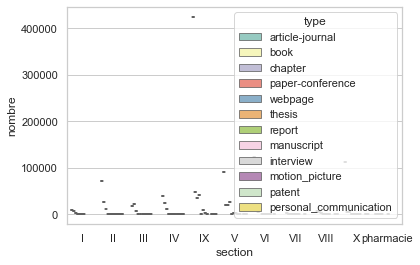

In [63]:
#long_df=df_selec.groupby(["section"])["type"].value_counts().reset_index(name="nombre_biblio_total_theses")
long_df=df_selec.groupby(["section"])["type"].value_counts().reset_index(name="nombre")
print(long_df.head())
#for i in range(0,len(long_df)):
#    print(long_df.iloc[i,:])
print( long_df["section"].value_counts())
print( long_df["type"].value_counts())
print(long_df[long_df["nombre"]==0])
print( long_df["nombre"].isnull().sum())
sns.boxplot(x="section", y="nombre", hue="type", data=long_df, palette="Set3") 

## 3.1CHI-SQUARE TEST OF INDEPENDENCE

In [64]:
print(long_df.head(20))
print(df_selec.head())

   section              type  nombre
0        I   article-journal    8598
1        I              book    7421
2        I           chapter    2817
3        I  paper-conference      50
4        I           webpage      33
5        I            thesis      17
6        I            report      16
7       II   article-journal   72751
8       II              book   26065
9       II           chapter   12709
10      II  paper-conference    1429
11      II            report     316
12      II            thesis     222
13      II           webpage     125
14      II        manuscript      43
15      II         interview       1
16      II    motion_picture       1
17      II            patent       1
18     III              book   22639
19     III   article-journal   19107
      section         numéro TEL     type
0           I  halshs-00005971v1  chapter
12638       I     tel-01529191v1     book
12637       I     tel-01529191v1     book
12636       I     tel-01529191v1     book
12635       I

In [65]:
contingency_df=pd.crosstab(index=df_selec['section'],columns=df_selec['type'] )
print(contingency_df)
print(contingency_df['book'].sum())

type       article-journal   book  chapter  interview  manuscript  \
section                                                             
I                     8598   7421     2817          0           0   
II                   72751  26065    12709          1          43   
III                  19107  22639     7128          2          10   
IV                   39699  24267    10729          5          18   
IX                  425108  48565    35718          0          34   
V                    91423  19921    19404          1          57   
VI                  124123  10522     6211          1          17   
VII                  46847   3174     1547          0           3   
VIII                 79970   6336     5418          0          11   
X                   113382   5430     4236          0          14   
pharmacie             1673     50       47          0           0   

type       motion_picture  paper-conference  patent  personal_communication  \
section                

In [192]:
norma_contingency_df=contingency_df.div(contingency_df.sum(axis=1), axis=0)
print(norma_contingency_df)

type       article-journal      book   chapter  interview  manuscript  \
section                                                                 
I                 0.453672  0.391568  0.148639   0.000000    0.000000   
II                0.640059  0.229318  0.111813   0.000009    0.000378   
III               0.380420  0.450743  0.141919   0.000040    0.000199   
IV                0.521600  0.318841  0.140967   0.000066    0.000236   
IX                0.751757  0.085882  0.063163   0.000000    0.000060   
V                 0.563026  0.122683  0.119499   0.000006    0.000351   
VI                0.811919  0.068827  0.040628   0.000007    0.000111   
VII               0.891339  0.060390  0.029434   0.000000    0.000057   
VIII              0.840250  0.066573  0.056927   0.000000    0.000116   
X                 0.904870  0.043335  0.033806   0.000000    0.000112   
pharmacie         0.937780  0.028027  0.026345   0.000000    0.000000   

type       motion_picture  paper-conference    pat

In [188]:
import scipy.stats as stats
stats.chi2_contingency(contingency_df)

(224704.65080179484,
 0.0,
 110,
 array([[1.37021753e+04, 2.33652757e+03, 1.41973627e+03, 1.33982887e-01,
         2.77344577e+00, 1.74177754e-01, 1.14438804e+03, 8.97685345e+00,
         1.20584599e-01, 1.08686918e+02, 2.13233765e+02, 1.50730748e+01],
        [8.21776252e+04, 1.40131244e+04, 8.51474691e+03, 8.03550914e-01,
         1.66335039e+01, 1.04461619e+00, 6.86336942e+03, 5.38379112e+01,
         7.23195823e-01, 6.51840502e+02, 1.27885128e+03, 9.03994778e+01],
        [3.63130782e+04, 6.19219258e+03, 3.76254083e+03, 3.55077274e-01,
         7.35009958e+00, 4.61600456e-01, 3.03282152e+03, 2.37901774e+01,
         3.19569547e-01, 2.88038685e+02, 5.65105482e+02, 3.99461933e+01],
        [5.50270454e+04, 9.38334284e+03, 5.70156856e+03, 5.38066566e-01,
         1.11379779e+01, 6.99486536e-01, 4.59578796e+03, 3.60504599e+01,
         4.84259909e-01, 4.36479598e+02, 8.56332940e+02, 6.05324887e+01],
        [4.08842777e+05, 6.97168442e+04, 4.23618079e+04, 3.99775470e+00,
         8.275

There is a relationship between , p< 0.0001.

In [193]:
import scipy.stats as stats
stats.chi2_contingency(norma_contingency_df)
## normalisation make p=1!!

(2.9744024135020704,
 1.0,
 110,
 array([[6.99699440e-01, 1.69653403e-01, 8.30127542e-02, 1.15465509e-05,
         1.47332556e-04, 1.77927962e-05, 3.60084569e-02, 2.61785803e-04,
         4.16900086e-06, 3.77077903e-03, 6.25733497e-03, 1.15520525e-03],
        [6.99699440e-01, 1.69653403e-01, 8.30127542e-02, 1.15465509e-05,
         1.47332556e-04, 1.77927962e-05, 3.60084569e-02, 2.61785803e-04,
         4.16900086e-06, 3.77077903e-03, 6.25733497e-03, 1.15520525e-03],
        [6.99699440e-01, 1.69653403e-01, 8.30127542e-02, 1.15465509e-05,
         1.47332556e-04, 1.77927962e-05, 3.60084569e-02, 2.61785803e-04,
         4.16900086e-06, 3.77077903e-03, 6.25733497e-03, 1.15520525e-03],
        [6.99699440e-01, 1.69653403e-01, 8.30127542e-02, 1.15465509e-05,
         1.47332556e-04, 1.77927962e-05, 3.60084569e-02, 2.61785803e-04,
         4.16900086e-06, 3.77077903e-03, 6.25733497e-03, 1.15520525e-03],
        [6.99699440e-01, 1.69653403e-01, 8.30127542e-02, 1.15465509e-05,
         1.473

In [189]:
import researchpy as rp
crosstab, test_results, expected = rp.crosstab(df_selec['section'], df_selec['type'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

print(crosstab)



                     type                                                     \
type      article-journal   book chapter interview manuscript motion_picture   
section                                                                        
I                    0.61   0.52    0.20       0.0       0.00            0.0   
II                   5.14   1.84    0.90       0.0       0.00            0.0   
III                  1.35   1.60    0.50       0.0       0.00            0.0   
IV                   2.81   1.72    0.76       0.0       0.00            0.0   
IX                  30.05   3.43    2.53       0.0       0.00            0.0   
V                    6.46   1.41    1.37       0.0       0.00            0.0   
VI                   8.77   0.74    0.44       0.0       0.00            0.0   
VII                  3.31   0.22    0.11       0.0       0.00            0.0   
VIII                 5.65   0.45    0.38       0.0       0.00            0.0   
X                    8.02   0.38    0.30

In [82]:
print(test_results)

                  Chi-square test      results
0  Pearson Chi-square ( 110.0) =   224704.6508
1                      p-value =        0.0000
2                   Cramer's V =        0.1260


In [181]:
import pingouin as pg
expected, observed, stats = pg.chi2_independence(df_selec, x='type', y='section')
print("Tableau de contingence attendu\n", expected)
print(30*"--")
print()
print("Tableau de contingence observé\n", observed)
print(30*"--")
print()
print("Tableau des statistiques\n", stats)
print(30*"--")

Tableau de contingence attendu
 section                            I            II           III  \
type                                                               
article-journal         13702.175322  82177.625242  36313.078182   
book                     2336.527572  14013.124392   6192.192584   
chapter                  1419.736267   8514.746907   3762.540828   
interview                   0.133983      0.803551      0.355077   
manuscript                  2.773446     16.633504      7.350100   
motion_picture              0.174178      1.044616      0.461600   
paper-conference         1144.388036   6863.369423   3032.821522   
patent                      8.976853     53.837911     23.790177   
personal_communication      0.120585      0.723196      0.319570   
report                    108.686918    651.840502    288.038685   
thesis                    213.233765   1278.851280    565.105482   
webpage                    15.073075     90.399478     39.946193   

section        

C:\ProgramData\Anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning:

Low count on observed frequencies.

C:\ProgramData\Anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning:

Low count on expected frequencies.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:6716: RuntimeWarning:

divide by zero encountered in power

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:6716: RuntimeWarning:

invalid value encountered in multiply

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:6713: RuntimeWarning:

divide by zero encountered in true_divide



In [182]:
residu=(observed-expected)/np.sqrt(expected)
#residu=(observed-expected) 
print(residu )

section                          I          II         III          IV  \
type                                                                     
article-journal         -43.604451  -32.883607  -90.292226  -65.342941   
book                    105.186606  101.809230  209.006301  153.649399   
chapter                  37.082973   45.453650   54.866053   66.580796   
interview                -0.366037    0.219151    2.760477    6.082822   
manuscript               -1.665367    6.464881    0.977424    2.056122   
motion_picture           -0.417346   -0.043653    8.151756    5.141983   
paper-conference        -32.350774  -65.596470  -38.474320  -54.147612   
patent                   -2.996140   -7.201145   -4.877518   -5.837654   
personal_communication   -0.347253   -0.850409   -0.565305   -0.695888   
report                   -8.890574  -13.154138  -14.555917  -14.095265   
thesis                  -13.438344  -29.553155  -18.092985  -25.094103   
webpage                   4.617478    

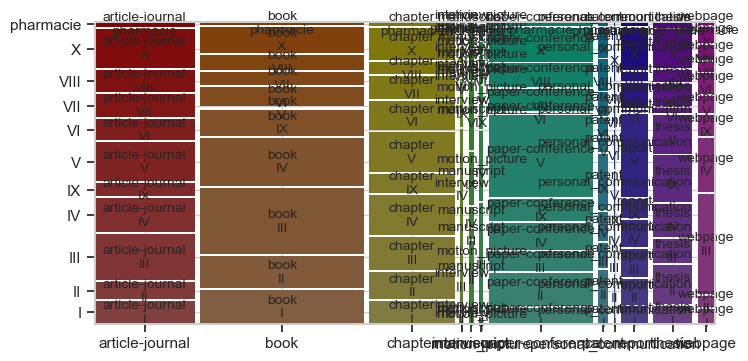

In [183]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic 
fig, ax = plt.subplots(figsize=(8, 4), dpi = 100)

mosaic(abs(residu.stack()), gap=0.01, ax =ax)
plt.show( )

## 3.2 Two-Way ANOVA ,
Two-Way ANOVA Assumptions: 
1. Normality – The response variable is approximately normally distributed for each group. 
2. Equal Variances – The variances for each group should be roughly equal. 
3. Independence – The observations in each group are independent of each other and the observations within groups were obtained by a random sample.

In [197]:
#method using statsmodels
print( long_df.isnull().sum().sum() )
print( long_df.head() )
print( long_df.shape )

0
  section              type  nombre
0       I   article-journal    8598
1       I              book    7421
2       I           chapter    2817
3       I  paper-conference      50
4       I           webpage      33
(105, 3)


In [198]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('nombre ~ section + type', data=long_df).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq    df         F    PR(>F)
section   2.497183e+10  10.0  1.752783  0.082534
type      8.593912e+10  11.0  5.483731  0.000002
Residual  1.182497e+11  83.0       NaN       NaN

In [199]:
#perform two-way ANOVA
model = ols('nombre ~ section*type', data=long_df).fit()
sm.stats.anova_lm(model, typ=2)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning:

divide by zero encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1452: RuntimeWarning:

invalid value encountered in multiply



ValueError: array must not contain infs or NaNs

average normal is -8.742236310527438e-10   ,std normal is   33558.72480677425


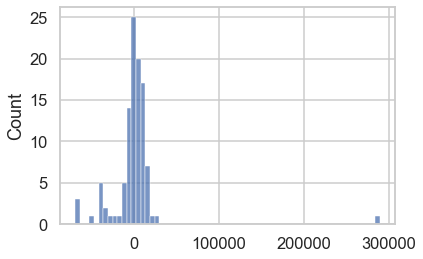

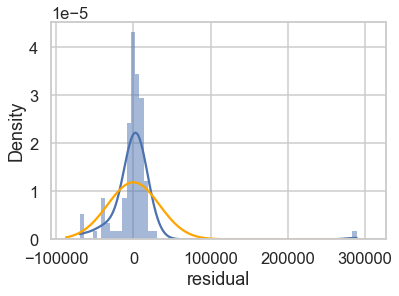

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



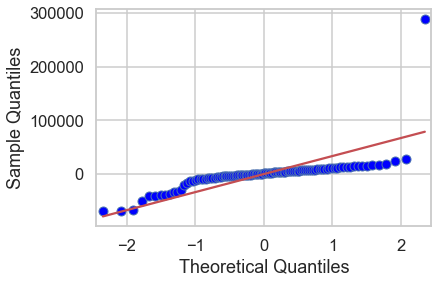

In [87]:
model = ols('nombre ~ section + type', data=long_df).fit()
sm.stats.anova_lm(model, typ=2)

 
sns.histplot(model.resid);

from scipy import stats
mu, std = stats.norm.fit(model.resid)
print( "average normal is " + str(mu)  +"   ,"+ "std normal is   "+ str(std)  )

 

fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=model.resid, ax=ax,  stat="density", linewidth=0, kde=True)
#ax.set(title="Distribution of residuals", xlabel="residual")
ax.set( xlabel="residual")
# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

sm.qqplot(model.resid, line='s');



In [96]:
# Régression linéaire simple
#model = smf.ols("video ~ gender + hdi ", data =anova_2factor).fit()
model = ols('nombre ~ section + type', data=long_df).fit() 
influence = model.get_influence()

#res =long_df.copy()
res['resid'] = model.resid
res['fittedvalues'] = model.fittedvalues
res['resid_std'] = model.resid_pearson
res['leverage'] = influence.hat_matrix_diag
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 nombre   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     3.525
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           2.12e-05
Time:                        06:15:37   Log-Likelihood:                -1243.2
No. Observations:                 105   AIC:                             2530.
Df Residuals:                      83   BIC:                             2589.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.



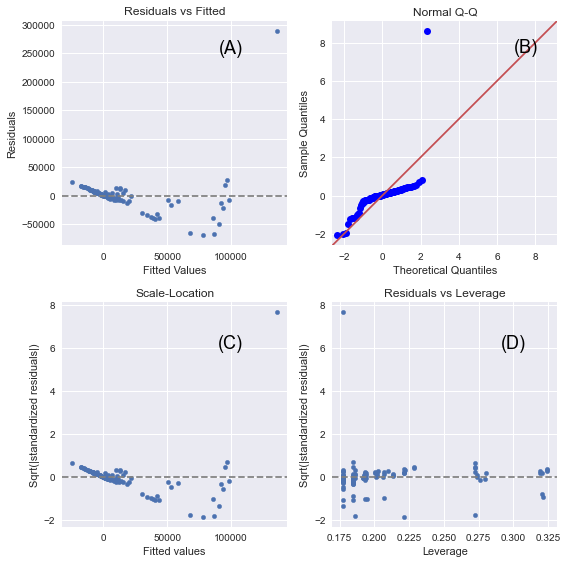

In [97]:
# Normalité de la distribution de la variable : quelques graphes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
plt.style.use('seaborn')
 

# Residual against fitted values.
res.plot.scatter(x='fittedvalues', y='resid', ax=axes[0, 0])
axes[0, 0].axhline(y=0, color='grey', linestyle='dashed')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')
axes[0, 0].text(100000, 250000, 
              "(A)",
              color="black",
              fontsize=18, 
              ha='center')
 # qqplot
sm.qqplot(res['resid'], fit=True, line='45',ax=axes[0, 1], c='#4C72B0')
axes[0, 1].set_title('Normal Q-Q')
axes[0, 1].text(7.5, 7.5, 
              "(B)",
              color="black",
              fontsize=18, 
              ha='center')

# The scale-location plot.
res.plot.scatter(
x='fittedvalues', y='resid_std', ax=axes[1, 0])
axes[1, 0].axhline(y=0, color='grey', linestyle='dashed')
axes[1, 0].set_xlabel('Fitted values')
axes[1, 0].set_ylabel('Sqrt(|standardized residuals|)')
axes[1, 0].set_title('Scale-Location')
axes[1, 0].text(100000, 6, 
              "(C)",
              color="black",
              fontsize=18, 
              ha='center')


# Standardized residuals vs. leverage
res.plot.scatter(x='leverage', y='resid_std', ax=axes[1, 1] )
axes[1, 1].axhline(y=0, color='grey', linestyle='dashed')
axes[1, 1].set_xlabel('Leverage')
axes[1, 1].set_ylabel('Sqrt(|standardized residuals|)')
axes[1, 1].set_title('Residuals vs Leverage')
axes[1,1].text(0.3, 6, 
              "(D)",
              color="black",
              fontsize=18, 
              ha='center')



plt.tight_layout()
plt.show()

<AxesSubplot:>

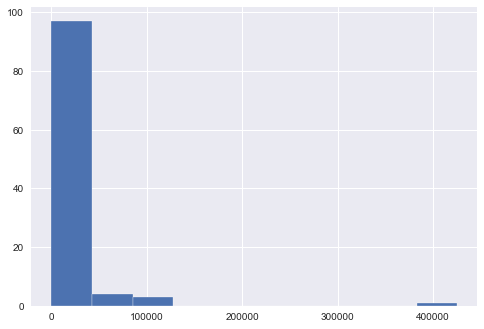

In [99]:
long_df.head()
long_df.nombre.hist()

In [110]:
#https://timeseriesreasoning.com/contents/poisson-regression-model/

import patsy

from statsmodels.genmod.families import Poisson
import numpy as np
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt


y, X = patsy.dmatrices( 'nombre ~ section + type', data=long_df, return_type='matrix')

result= sm.GLM(y, X, family=Poisson()).fit()
 
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 nombre   No. Observations:                  105
Model:                            GLM   Df Residuals:                       83
Model Family:                 Poisson   Df Model:                           21
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0030e+05
Date:                Tue, 30 Aug 2022   Deviance:                   1.9979e+05
Time:                        06:48:14   Pearson chi2:                 2.24e+05
No. Iterations:                    13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

## organisation du parti de l'inférence statistique:

1. on fait un chi-2 pour les indépendances de variable "type" et "section" et trouve qu'ils sont dépendent.

2. avec ANOVA de deux facteurs, entre"type" et "section", on peut trouve l'effet de ces deux variables sur le "nombre de theses dans chaque section et type".  Et on ne peut que trouve l'effet de "type" est important.

3. avec  normalité de la distribution de "nombre de theses dans chaque section et type", il  ne confirme pas la normalité, donc,  le GLMde type poisson est utilisé pour estimer l'effect de variable de "type" et "section". Et on trouve qu'ils ont tous donné l'influence. 


$\color{red}{\text{Question 1. cette organisation de logique est correct ?}}$

$\color{red}{\text{Question 2: dans l'organisation 2, l'interaction entre "type" et "section" ne peut pas calcul(figure attachée). Ça peut arriver ?}}$



  section              type  nombre
0       I   article-journal    8598
1       I              book    7421
2       I           chapter    2817
3       I  paper-conference      50
4       I           webpage      33


<AxesSubplot:>

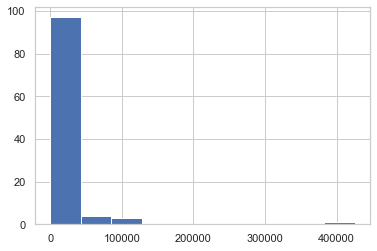

In [66]:
print( long_df.head() )
long_df.nombre.hist()

organisation 1: Chi-square

In [67]:
import researchpy as rp
crosstab, test_results, expected = rp.crosstab(df_selec['section'], df_selec['type'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

print(test_results)


                  Chi-square test      results
0  Pearson Chi-square ( 110.0) =   224704.6508
1                      p-value =        0.0000
2                   Cramer's V =        0.1260


organisation 2 :two-way ANOVA

In [68]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('nombre ~ section + type', data=long_df).fit()
sm.stats.anova_lm(model, typ=2) 

sum_sq    df         F    PR(>F)
section   2.497183e+10  10.0  1.752783  0.082534
type      8.593912e+10  11.0  5.483731  0.000002
Residual  1.182497e+11  83.0       NaN       NaN

In [69]:
#perform two-way ANOVA
model = ols('nombre ~ section*type', data=long_df).fit()
sm.stats.anova_lm(model, typ=2)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning:

divide by zero encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1452: RuntimeWarning:

invalid value encountered in multiply



ValueError: array must not contain infs or NaNs

organisation 3

                            OLS Regression Results                            
Dep. Variable:                 nombre   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     3.525
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           2.12e-05
Time:                        08:17:20   Log-Likelihood:                -1243.2
No. Observations:                 105   AIC:                             2530.
Df Residuals:                      83   BIC:                             2589.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.



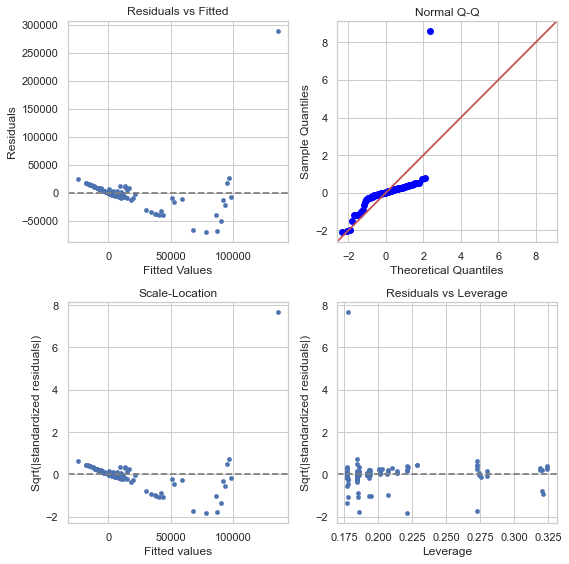

In [72]:
# Régression linéaire simple
#model = smf.ols("video ~ gender + hdi ", data =anova_2factor).fit()
model = ols('nombre ~ section + type', data=long_df).fit() 
influence = model.get_influence()

res=long_df.copy()
res['resid'] = model.resid
res['fittedvalues'] = model.fittedvalues
res['resid_std'] = model.resid_pearson
res['leverage'] = influence.hat_matrix_diag
print(model.summary())

# Normalité de la distribution de la variable : quelques graphes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
plt.style.use('seaborn')
 

# Residual against fitted values.
res.plot.scatter(x='fittedvalues', y='resid', ax=axes[0, 0])
axes[0, 0].axhline(y=0, color='grey', linestyle='dashed')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')

 # qqplot
sm.qqplot(res['resid'], fit=True, line='45',ax=axes[0, 1], c='#4C72B0')
axes[0, 1].set_title('Normal Q-Q')

# The scale-location plot.
res.plot.scatter(
x='fittedvalues', y='resid_std', ax=axes[1, 0])
axes[1, 0].axhline(y=0, color='grey', linestyle='dashed')
axes[1, 0].set_xlabel('Fitted values')
axes[1, 0].set_ylabel('Sqrt(|standardized residuals|)')
axes[1, 0].set_title('Scale-Location')

# Standardized residuals vs. leverage
res.plot.scatter(x='leverage', y='resid_std', ax=axes[1, 1] )
axes[1, 1].axhline(y=0, color='grey', linestyle='dashed')
axes[1, 1].set_xlabel('Leverage')
axes[1, 1].set_ylabel('Sqrt(|standardized residuals|)')
axes[1, 1].set_title('Residuals vs Leverage')

plt.tight_layout()
plt.show()

In [75]:
#https://timeseriesreasoning.com/contents/poisson-regression-model/

import patsy

from statsmodels.genmod.families import Poisson
import numpy as np
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt


y, X = patsy.dmatrices( 'nombre ~ section + type', data=long_df, return_type='matrix')

result= sm.GLM(y, X, family=Poisson()).fit()
 
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 nombre   No. Observations:                  105
Model:                            GLM   Df Residuals:                       83
Model Family:                 Poisson   Df Model:                           21
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0030e+05
Date:                Tue, 06 Sep 2022   Deviance:                   1.9979e+05
Time:                        13:22:35   Pearson chi2:                 2.24e+05
No. Iterations:                    13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [84]:
print( type_weight_sec1.head())
print(long_df.head())
poi=type_weight_sec1[["section","type","countVSpap"]].copy()
print(poi.head())

  section              type  count  countVSpap
0       I   article-journal   8598    0.453648
1       I              book   7421    0.391548
2       I           chapter   2818    0.148684
3       I  paper-conference     50    0.002638
4       I            report     16    0.000844
  section              type  nombre
0       I   article-journal    8598
1       I              book    7421
2       I           chapter    2817
3       I  paper-conference      50
4       I           webpage      33
  section              type  countVSpap
0       I   article-journal    0.453648
1       I              book    0.391548
2       I           chapter    0.148684
3       I  paper-conference    0.002638
4       I            report    0.000844


In [86]:
from statsmodels.formula.api import glm
from statsmodels.genmod import families
my_model = glm("countVSpap ~  section  + type  ", poi, family = sm.families.Poisson()).fit()
print(my_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             countVSpap   No. Observations:                  105
Model:                            GLM   Df Residuals:                       83
Model Family:                 Poisson   Df Model:                           21
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19.038
Date:                Tue, 06 Sep 2022   Deviance:                       2.7474
Time:                        13:40:39   Pearson chi2:                     2.96
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   